In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

In [8]:
moe = 13.2
sigma = 2.5
n= 40
xbar = 12.2
alpha = 0.01

In [6]:
z = (xbar - moe) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [23]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [24]:
if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [63]:
df = pd.read_csv("soil - Sheet1.csv")

In [64]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [66]:
df.Soil1.fillna(df.Soil1.mean(), inplace=True)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   35 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [73]:
stats.ttest_ind(df.Soil1, df.Soil2)

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.3882688811130734

In [121]:
df = pd.read_csv("2015 PISA Test - Sheet1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [109]:
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [122]:
df.groupby("Continent_Code", dropna=False)["Country Code"].value_counts()

Continent_Code  Country Code
AF              DZA             1
                TUN             1
AS              ARE             1
                CHN             1
                GEO             1
                               ..
NaN             CAN             1
                CRI             1
                DOM             1
                MEX             1
                USA             1
Name: Country Code, Length: 70, dtype: int64

In [123]:
df.Continent_Code.value_counts()

EU    37
AS    17
SA     7
OC     2
AF     2
Name: Continent_Code, dtype: int64

In [124]:
df.Continent_Code.fillna("SA", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          70 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [125]:
df = df[(df["Continent_Code"] == "EU") | (df["Continent_Code"] == "AS")]
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
5,BEL,EU,85.052900,506.9844,498.5242,501.9997
6,BGR,EU,56.656300,441.1899,431.7175,445.7720


<AxesSubplot:xlabel='Math', ylabel='Continent_Code'>

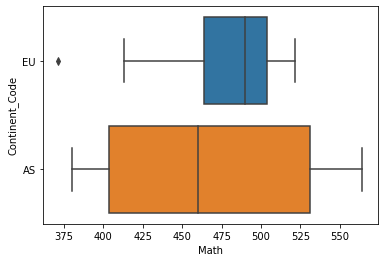

In [126]:
sns.boxplot(y="Continent_Code", data=df, x="Math")

In [128]:
df.groupby("Continent_Code")["Math"].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AS,17.0,466.216647,64.356490,380.2590,403.8332,459.8160,531.2961,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.0401,489.7287,503.7220,521.2506


In [127]:
stats.ttest_ind(df[df["Continent_Code"]=="EU"]["Math"],
                df[df["Continent_Code"]=="AS"]["Math"],
                equal_var = True)

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

EXERCISE 4.  A gym operator organized a 2-month exercise and diet program for 15 customers suffering from their excess weight. To evaluate whether this diet program was effective, he measured the customers' starting and ending weights and recorded them in the computer. Did the exercise and diet program have an impact on customers' weight loss? Use an α = .01 level test.  Weight Dataset

CHECK: statistic=2.67808348404993, pvalue=0.00900646517506627

In [147]:
df = pd.read_csv("weight - Sheet1.csv")
df

,ID,starting,ending,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1.0,76.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,81.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,86.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,71.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,88.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
df = df.iloc[:15, :3]
df

,ID,starting,ending
0,1.0,76.0,72.0
1,2.0,81.0,82.0
2,3.0,86.0,84.0
3,4.0,71.0,71.0
4,5.0,88.0,83.0
5,6.0,78.0,74.0
6,7.0,76.0,70.0
7,8.0,81.0,80.0
8,9.0,79.0,78.0
9,10.0,77.0,79.0


In [149]:
stats.ttest_rel(df.starting, df.ending, alternative='greater')

Ttest_relResult(statistic=2.6780834840499255, pvalue=0.00900646517506626)

In [150]:
# At 99% confidence interval exercise and diet program have an impact on customers' weight loss.